In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import torch
import sys
from helpers_task_detector import *
sys.path.append('../')
from src.helpers import *
from src.visualize import *
from src.trainer import *
from src.trainer_hnet import * 
from Models.models import *
import json

import seaborn as sns
import matplotlib.pyplot as plt

/home/nerea/anaconda3/envs/sinthlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the list of experiments from JSON
with open(os.path.join('config.json'), 'r') as f:
    experiments = json.load(f)
    
path_to_hnets = './Models/Models_HNET_Block3'

In [3]:
experiment0_hnet_v0 = 'Experiment11_Task3'
models_exp0_hnet_v0 = np.sort(os.listdir(os.path.join(path_to_hnets, experiment0_hnet_v0)))


path_results_exp0_v0 = './Results/' + experiment0_hnet_v0
with open(os.path.join(path_results_exp0_v0 +'.pkl'), 'rb') as fp:
    results_hnet_exp0_v0 = pickle.load(fp)

data_path_exp0_v0 = './Data/Sim_Data_Experiment60_sorted'+'.pkl'
with open(os.path.join(data_path_exp0_v0), 'rb') as fp:
    data_exp0_v0 = pickle.load(fp)

In [4]:
model1 = torch.load(os.path.join(path_to_hnets,experiment0_hnet_v0, models_exp0_hnet_v0[1] ))
model2 = torch.load(os.path.join(path_to_hnets,experiment0_hnet_v0, models_exp0_hnet_v0[2] ))
model9 = torch.load(os.path.join(path_to_hnets,experiment0_hnet_v0, models_exp0_hnet_v0[4] ))

In [5]:
first_task = list(data_exp0_v0.keys())[1]

In [6]:
x_train, y_train, x_val, y_val, x_test, y_test = data_exp0_v0[first_task]
W_1 = model1(cond_id = 1)
W_2 = model2(cond_id = 1)
W_9 = model9(cond_id = 1)

In [7]:
main_net = RNN_Main_Model(num_features= 130, hnet_output = W_1,  hidden_size = 300,
                                        num_layers= 1,out_dims=2,  
                                        dropout= 0.2,  LSTM_ = False)

In [8]:
r2_1, _ = calc_explained_variance_mnet(x_test, y_test, W_1, main_net)

In [9]:
r2_1

0.847913384437561

In [10]:
r2_2, _ = calc_explained_variance_mnet(x_test, y_test, W_2, main_net)


In [11]:
r2_2

0.8004659712314606

In [12]:
r2_9, _ = calc_explained_variance_mnet(x_test, y_test, W_9, main_net)

In [13]:
r2_9

0.8043687045574188

In [14]:
task_performances = {}
best_perf = {}
for d in data_exp0_v0.keys():
    x_train, y_train, x_val, y_val, x_test, y_test = data_exp0_v0[d]
    data_perf = []
    model = torch.load(os.path.join(path_to_hnets,experiment0_hnet_v0, models_exp0_hnet_v0[-1] ))
    for cond in range(len(models_exp0_hnet_v0)):
        W = model(cond_id = cond)
        r2_, _ = calc_explained_variance_mnet(x_test, y_test, W, main_net)
        data_perf.append(r2_)
    task_performances[d] = data_perf
    best_perf[d] = max(data_perf)


In [15]:
best_perf

{'Data_0_1': 0.7434818744659424,
 'Data_2_2': 0.8074260354042053,
 'Data_4_1': 0.656975269317627,
 'Data_3_1': 0.6786300539970398,
 'Data_1_2': 0.7779673933982849,
 'Data_3_2': 0.6811297833919525,
 'Data_4_2': 0.5890040099620819,
 'Data_0_2': 0.7921942174434662,
 'Data_1_1': 0.7809967994689941,
 'Data_2_1': 0.7994233667850494}

In [16]:
results_hnet_exp0_v0['Data_0_1'].keys()

dict_keys(['y_true_hnet', 'y_pred_hnet', 'r2_test_hnet', 'hnet_train_losses', 'hnet_val_losses', 'training_time', 'change_detect_epoch', 'prev_active_context', 'prev_min_loss', 'prev_mean_loss', 'new_tested_context', 'new_loss', 'new_mean_loss'])

In [17]:
keys_to_extract = ['change_detect_epoch', 'prev_active_context', 'prev_min_loss', 'prev_mean_loss', 'new_tested_context', 'new_loss', 'new_mean_loss']


In [18]:
# Move tensors to CPU and convert to lists, handle non-tensor values appropriately
def generate_dict_changes(dataset, keys_to_extract):
    filtered_data = {}
    results = results_hnet_exp0_v0[dataset]
    for key in keys_to_extract:
        if key in results:
            value = results[key]
            if isinstance(value[0], torch.Tensor):
                filtered_data[key] = [tensor.cpu().item() for tensor in value]
            else:
                filtered_data[key] = value
    return pd.DataFrame(filtered_data)
    

In [19]:
keys = list(results_hnet_exp0_v0.keys())
data_dict1 = generate_dict_changes(keys[1], keys_to_extract)
data_dict1['Dataset'] = keys[1]
data_dict2 = generate_dict_changes(keys[2], keys_to_extract)
data_dict2['Dataset'] = keys[2]
data_dict3 = generate_dict_changes(keys[3], keys_to_extract)
data_dict3['Dataset'] = keys[3]
data_dict4 = generate_dict_changes(keys[4], keys_to_extract)
data_dict4['Dataset'] = keys[4]
data_dict5 = generate_dict_changes(keys[5], keys_to_extract)
data_dict5['Dataset'] = keys[5]
data_dict6 = generate_dict_changes(keys[6], keys_to_extract)
data_dict6['Dataset'] = keys[6]
data_dict7 = generate_dict_changes(keys[7], keys_to_extract)
data_dict7['Dataset'] = keys[7]
data_dict8 = generate_dict_changes(keys[8], keys_to_extract)
data_dict8['Dataset'] = keys[8]
data_dict9 = generate_dict_changes(keys[9], keys_to_extract)
data_dict9['Dataset'] = keys[9]
dataframes = [data_dict1, data_dict2, data_dict3, data_dict4, data_dict5, data_dict6, data_dict7, data_dict8, data_dict9]
df_changes = pd.concat(dataframes, ignore_index=True)

In [20]:
def true_task_dict(data):
    max_id = 1
    found_ids = ['0']
    true_task_map = {}
    true_task_map['Data_0_1'] = 0
    for d in data.Dataset.unique():
        new_id = d.split('_')[1]
        print('New id', new_id)
        print(found_ids)
        if new_id not in found_ids:
            found_ids.append(new_id)
            true_task_map[d] = max_id
            max_id += 1
        else:
            idx_id = found_ids.index(new_id)
            true_task_map[d] = idx_id

    return true_task_map

In [21]:
task_dict = true_task_dict(df_changes)

New id 2
['0']
New id 4
['0', '2']
New id 3
['0', '2', '4']
New id 1
['0', '2', '4', '3']
New id 3
['0', '2', '4', '3', '1']
New id 4
['0', '2', '4', '3', '1']
New id 0
['0', '2', '4', '3', '1']
New id 1
['0', '2', '4', '3', '1']
New id 2
['0', '2', '4', '3', '1']


In [22]:
task_dict

{'Data_0_1': 0,
 'Data_2_2': 1,
 'Data_4_1': 2,
 'Data_3_1': 3,
 'Data_1_2': 4,
 'Data_3_2': 3,
 'Data_4_2': 2,
 'Data_0_2': 0,
 'Data_1_1': 4,
 'Data_2_1': 1}

In [23]:
df_changes['Task'] = df_changes['Dataset'].apply(lambda x: task_dict[x])

In [24]:
df_changes

,change_detect_epoch,prev_active_context,prev_min_loss,prev_mean_loss,new_tested_context,new_loss,new_mean_loss,Dataset,Task
0,0,0,4.809551,1.9507136,0,6.669579,2.535928,Data_2_2,1
1,0,1,3.0278165,2.0714731,0,13.630539,2.730999,Data_4_1,2
2,0,1,3.0278165,2.0714731,1,12.314033,2.692915,Data_4_1,2
3,0,2,7.3551197,2.3153715,0,7.6767597,2.926071,Data_3_1,3
4,0,2,7.3551197,2.3153715,1,11.669703,2.900063,Data_3_1,3
5,0,2,7.3551197,2.3153715,2,10.3455715,3.009983,Data_3_1,3
6,0,3,7.219227,2.292477,0,12.172023,3.121142,Data_1_2,4
7,0,3,7.219227,2.292477,1,16.68453,3.107210,Data_1_2,4
8,0,3,7.219227,2.292477,2,15.946716,3.241520,Data_1_2,4
9,0,3,7.219227,2.292477,3,10.353372,2.980220,Data_1_2,4


In [25]:
results_hnet_exp0_v0['Data_4_1']['new_tested_context']

[0, 1]

In [26]:
results_hnet_exp0_v0.keys()

dict_keys(['Data_0_1', 'Data_2_2', 'Data_4_1', 'Data_3_1', 'Data_1_2', 'Data_3_2', 'Data_4_2', 'Data_0_2', 'Data_1_1', 'Data_2_1'])

In [27]:
def set_plot_style():
    # Define the custom color palette
    custom_palette = [
        '#5F9EA0', # cadet blue
        '#FFD700', # gold
        '#FFA07A', # light salmon
        '#87CEEB', # light blue
        '#9370DB', # medium purple
        '#98FB98'  # pale green
    ]
    
    # Set the Seaborn palette
    sns.set_palette(custom_palette)
    
    # Set general plot aesthetics
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("whitegrid")

    # Update Matplotlib rcParams for consistent styling
    plt.rcParams.update({
        'figure.figsize': (12, 7),
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.title_fontsize': 13,
        'legend.fontsize': 11,
        'axes.titlepad': 20,
        'axes.labelpad': 10,
        'xtick.major.pad': 5,
        'ytick.major.pad': 5
    })

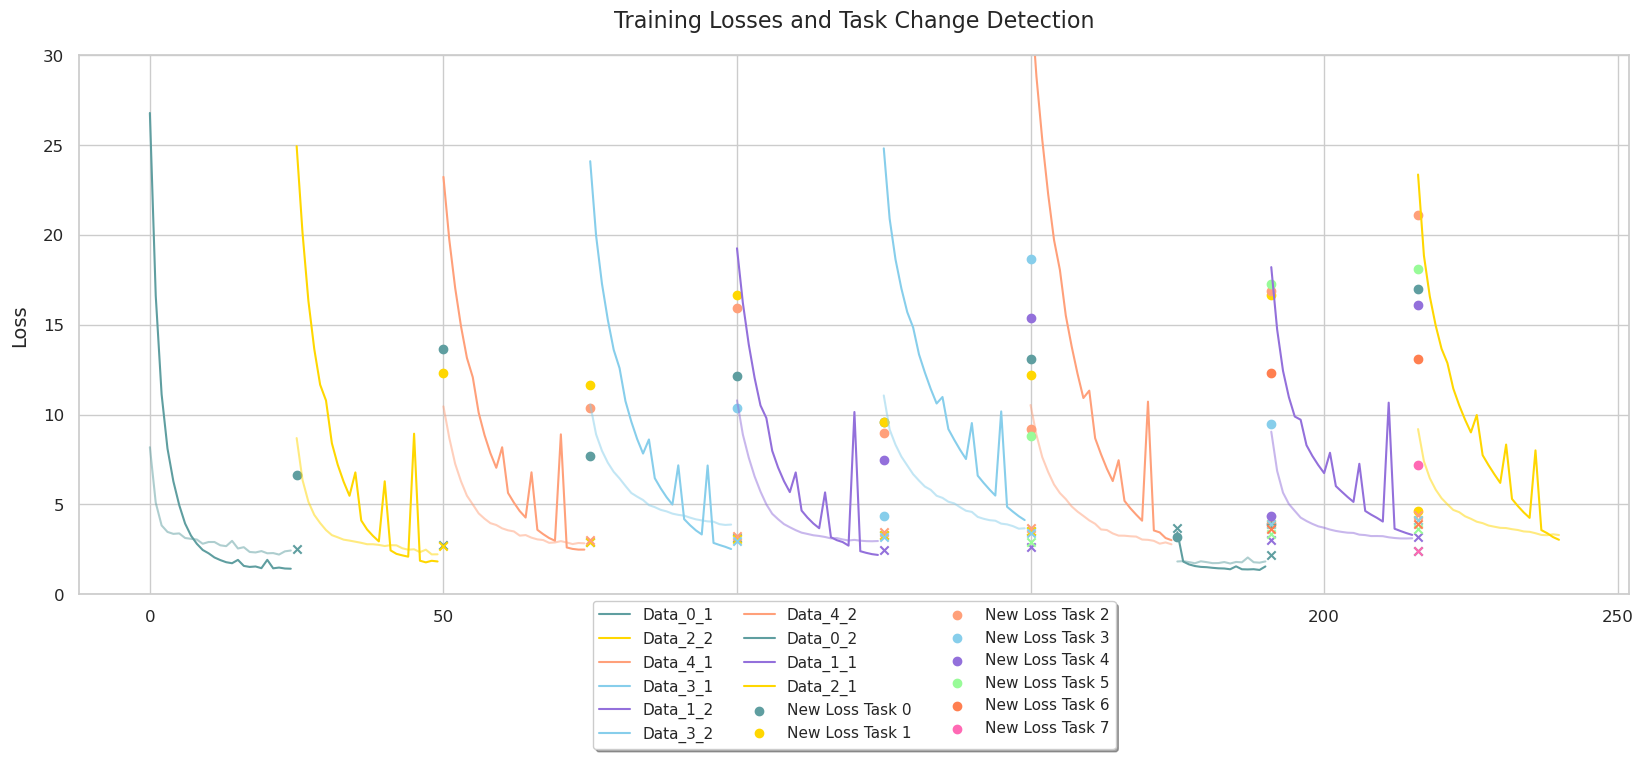

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample DataFrame creation for demonstration (you can skip this if you already have df_changes)
# df_changes = pd.read_csv('path_to_your_dataframe.csv')  # Use this line to load your DataFrame

# Assuming df_changes and results_hnet_exp0_v0 are already defined

# Plot settings
plt.figure(figsize=[20, 7])

set_plot_style()

custom_palette = [
    '#5F9EA0',  # cadet blue
    '#FFD700',  # gold
    '#FFA07A',  # light salmon
    '#87CEEB',  # light blue
    '#9370DB',  # medium purple
    '#98FB98',  # pale green
    '#FF7F50',  # coral
    '#FF69B4',  # hot pink
    '#20B2AA',  # light sea green
    '#FF6347',  # tomato
    '#4682B4',  # steel blue
    '#DA70D6',  # orchid
    '#32CD32'   # lime green
]

# Plot the training losses for each task
task_data_keys = list(results_hnet_exp0_v0.keys())
unique_tasks = range(len(task_data_keys))
#colors = sns.color_palette("hsv", len(unique_tasks))
color_map = {task: custom_palette[i] for i, task in enumerate(unique_tasks)}

highest_tested_task = np.max(df_changes.new_tested_context.unique())
dataset_legend = df_changes.loc[df_changes.new_tested_context == highest_tested_task]['Dataset'].values

start_epoch = 0
for i, key in enumerate(task_data_keys):
    task = task_dict[key]
    if i < len(task_data_keys):
        start_epoch = start_epoch
        end_epoch = start_epoch + len(results_hnet_exp0_v0[key]['hnet_train_losses'])
        plt.plot(
            np.arange(start_epoch, end_epoch), 
            results_hnet_exp0_v0[key]['hnet_train_losses'], 
            label=key,
            color= color_map[task] , #color_map[task]
        )

        plt.plot(
            np.arange(start_epoch, end_epoch), 
            results_hnet_exp0_v0[key]['hnet_val_losses'], 
            color=color_map[task],
            alpha = 0.5
        )
    
    # Scatter plot for change detection and losses
    changes_dataset = df_changes[df_changes.Dataset == key]   
    if len(changes_dataset.Task.unique()) > 0:
        task = int(changes_dataset.Task.unique())
        for new_task in changes_dataset.new_tested_context.unique():
            data_new_task = changes_dataset[changes_dataset.new_tested_context == new_task]
            if key == dataset_legend:
                plt.scatter(
                    #(data_new_task.prev_active_context + 1) * 15, 
                    start_epoch,
                    data_new_task['new_loss'], 
                    color=color_map[new_task], 
                    label=f'New Loss Task {new_task}', 
                    marker='o'
                )
            else:
                plt.scatter(
                    #(data_new_task.prev_active_context + 1) * 15, 
                    start_epoch,
                    data_new_task['new_loss'], 
                    color=color_map[new_task], 
                    #label=f'New Loss Task {new_task}', 
                    marker='o'
                )

            plt.scatter(
                start_epoch,
                #(data_new_task.prev_active_context + 1) * 15, 
                data_new_task['new_mean_loss'], 
                color=color_map[new_task], 
                #label=f'Mean Loss Task {new_task}', 
                marker='x'
            )
    start_epoch = end_epoch

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses and Task Change Detection')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, shadow=True)
plt.ylim([0, 30])
plt.show()